In [3]:

import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np

sns.set_palette("viridis")

In [5]:
df = pd.read_csv('AmesHousing.csv')
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


# Explanatory Data Analysis

The main goal of the Explanatory Data Analysis is to understand deeper the structure of the dataset, detect missing values and outlier. Moreover the target variable Saleprice will be analyzed and various relationships between housing feature is set to be uncovered. This stage is critical because it will help us choose the correct housing features for our regression models in a later stage.


## 2.1 Target Variable:Housing Sale Prices(SalePrice)

To begin with, analyzing the distribution and the boxplot of the target variable will helps us understand overall price trends, detect outliers, and check whether the data is normally distributed — an important step before applying statistical or predictive models.

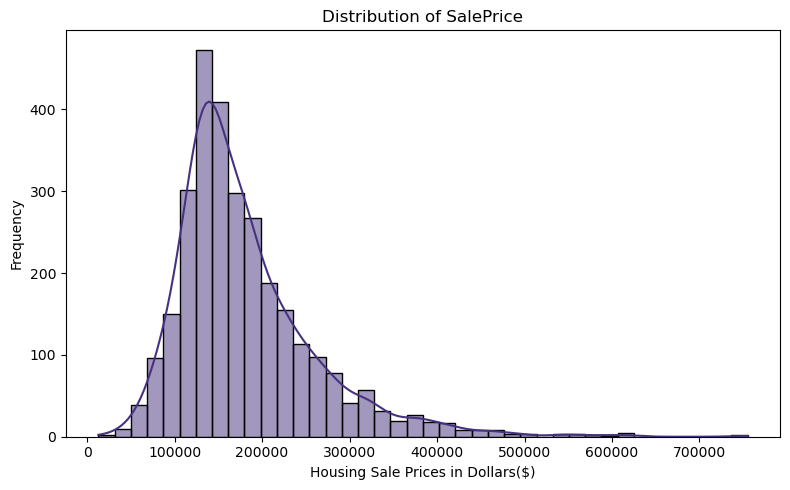

The cheapest house sold for $12,789 and the most expensive for $755,000
The average sales price is $180,796, while median is $160,000


In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df["SalePrice"], kde=True, bins=40)
plt.title("Distribution of SalePrice")
plt.xlabel("Housing Sale Prices in Dollars($)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### Distribution of SalePrice:
Examining the distribution of the target variable SalePrice we can easily obverve that it is positively skewed.Therefore, most homes are sold at lower to mid-range prices, while a smaller number of high-value properties extend the tail to the right. A method to confirm the presence of outlier is to use the boxplot and visualize these outliers.

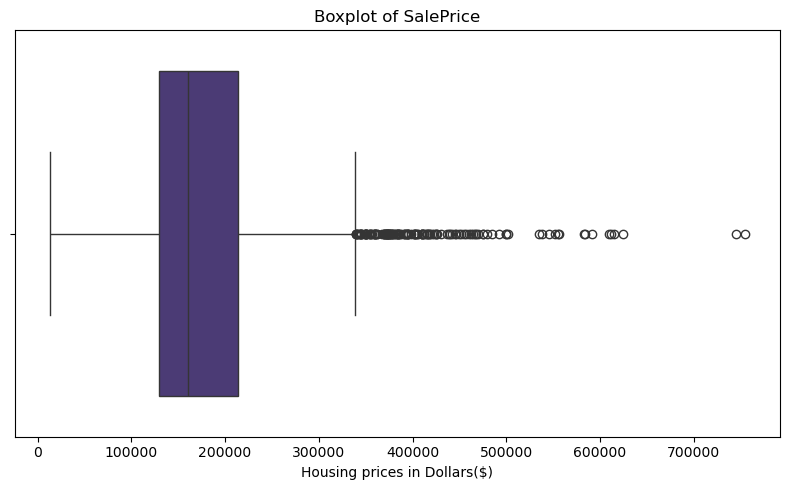

Number of outliers in SalePrice: 137
The cheapest house sold for $12,789 and the most expensive for $755,000
The average sales price is $180,796, while median is $160,000


In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["SalePrice"])
plt.title("Boxplot of SalePrice")
plt.xlabel("Housing prices in Dollars($)")
plt.tight_layout()
plt.show()

Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Count the outliers
num_outliers = ((df['SalePrice'] < lower_limit) | (df['SalePrice'] > upper_limit)).sum()
print("Number of outliers in SalePrice:", num_outliers)

print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    df.SalePrice.min(), df.SalePrice.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    df.SalePrice.mean(), df.SalePrice.median()))

### Boxplot of SalePrice:
The result of a right-skewed distribution is confirmed from the boxplot of the SalePrice as we can visualize now the number of outliers. A solid conclusion is that most of the outliers are seem to be on the upper whisker and 4.68% of the total number of obvervations can be recorded as outliers.

## Seasonal Trends in Sales Over Time

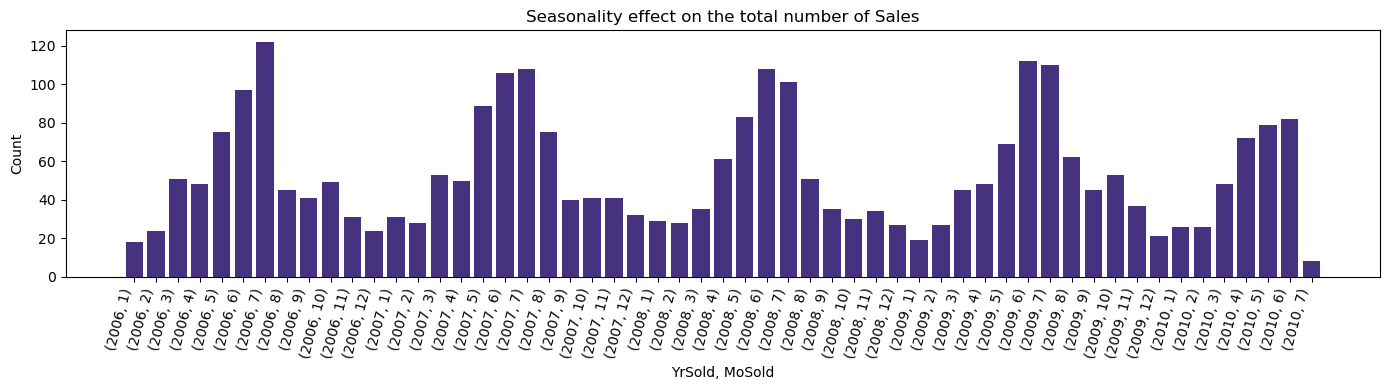

In [69]:
for col in ["Yr Sold", "Mo Sold"]:
    if col not in df.columns:
        raise KeyError(f"Απουσιάζει η στήλη: {col}")

tmp = (
    df[["Yr Sold", "Mo Sold"]]
    .dropna()
    .astype({"Yr Sold": int, "Mo Sold": int})
    .groupby(["Yr Sold", "Mo Sold"])
    .size()
    .reset_index(name="count")
    .sort_values(["Yr Sold", "Mo Sold"])
)
labels = [f"({y}, {m})" for y, m in zip(tmp["Yr Sold"], tmp["Mo Sold"])]

plt.ioff() 
fig = plt.figure(figsize=(14, 4)) 
ax = fig.gca()

x = np.arange(len(tmp))
ax.bar(x, tmp["count"])
ax.set_title("Seasonality effect on the total number of Sales")
ax.set_xlabel("YrSold, MoSold")
ax.set_ylabel("Count")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=75, ha="right")

fig.tight_layout()
plt.show()

## 2.2 Correlation of Housing features to Sale Price(SalePrice):
In this stage we will explore the relationships between the housing features and the prices that they are sold. By visulizing and computing the correlations, we aim to tackle which attributes(such as year sold,lot area and overall quality) have the highest influence on the target variable SalePrice. A stage that will guide us upon the feature selection for our predictive model.

## Heatmap with the Top 10 Numeric Housing Features Correlation(Positive) on Sale Price:

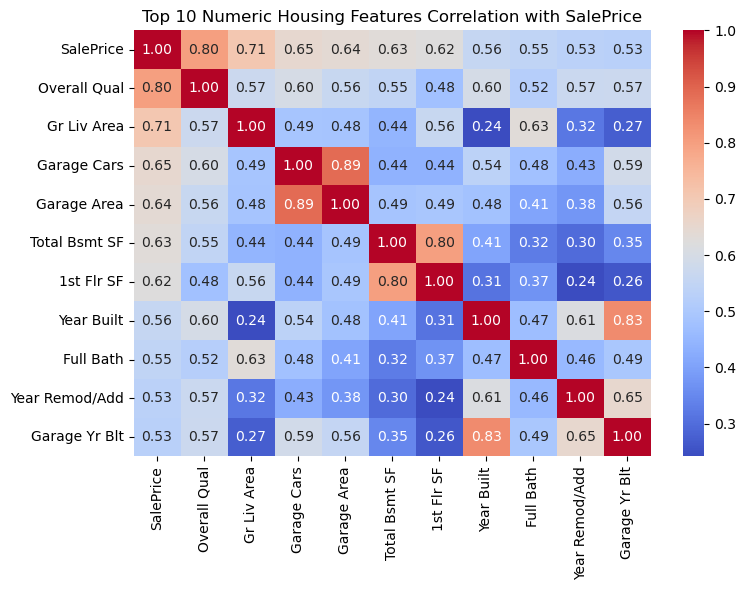

In [47]:
corr = df.corr(numeric_only=True)
top_corr = corr["SalePrice"].sort_values(ascending=False).head(11).index

plt.figure(figsize=(8,6))b
sns.heatmap(df[top_corr].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top 10 Numeric Housing Features Correlation with SalePrice")
plt.tight_layout()
plt.savefig("top_corr_heatmap.png")
plt.show()

**Strongest positive correlations with SalePrice:**
- Overall Qual (0.80) – Overall house quality
- Gr Liv Area (0.71) – Above-ground living area
- Garage Cars (0.65) and Garage Area (0.64) – Garage size and capacity
- Total Bsmt SF (0.63) – Basement size

**Moderate correlations:**
- 1st Flr SF (0.62),
- Year Built (0.56), 
- Full Bath (0.55), 
- Year Remod/Add (0.53), 
- Garage Yr Blt (0.53)

**Observations:**
- Features like Overall Qual and Gr Liv Area are the most influential in predicting SalePrice.
- Some features, like garage-related ones, are highly correlated with each other (Garage Cars and Garage Area = 0.89), which may indicate multicollinearity if used together in a model.

## Heatmap with the Top 10 Categorical Features Correlation with Saleprice:

Top 10 categorical features negatively correlated with SalePrice:
 Exter Qual      -0.647616
Kitchen Qual    -0.613689
Bsmt Qual       -0.479584
Heating QC      -0.425473
Garage Finish   -0.308464
Lot Shape       -0.292250
Garage Type     -0.238806
Bsmt Exposure   -0.210295
Fence           -0.190615
MS Zoning       -0.137472
dtype: float64


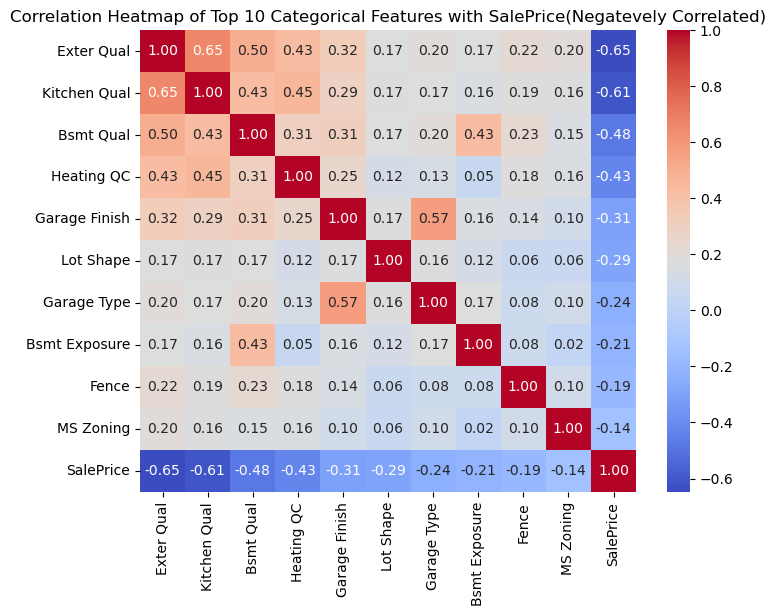

In [39]:
#Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Label encode categorical features
df_cat = df[categorical_cols].apply(lambda x: x.astype('category').cat.codes)

# Spearman correlation with SalePrice
cat_corr = df_cat.corrwith(df['SalePrice']).sort_values(ascending=True)

# Top 10 categorical features
top_cat = cat_corr[:10]
print("Top 10 categorical features negatively correlated with SalePrice:\n", top_cat)

plt.figure(figsize=(8, 6))
sns.heatmap(df_cat[top_cat.index].assign(SalePrice=df['SalePrice']).corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Top 10 Categorical Features with SalePrice(Negatevely Correlated)")
plt.show()


Top 10 categorical features posivetely correlated with SalePrice:
 Mas Vnr Type      0.432907
Foundation        0.406601
Fireplace Qu      0.385045
Paved Drive       0.275964
Garage Cond       0.271304
Garage Qual       0.269057
Central Air       0.264506
Roof Style        0.257170
Electrical        0.231793
Sale Condition    0.230125
dtype: float64


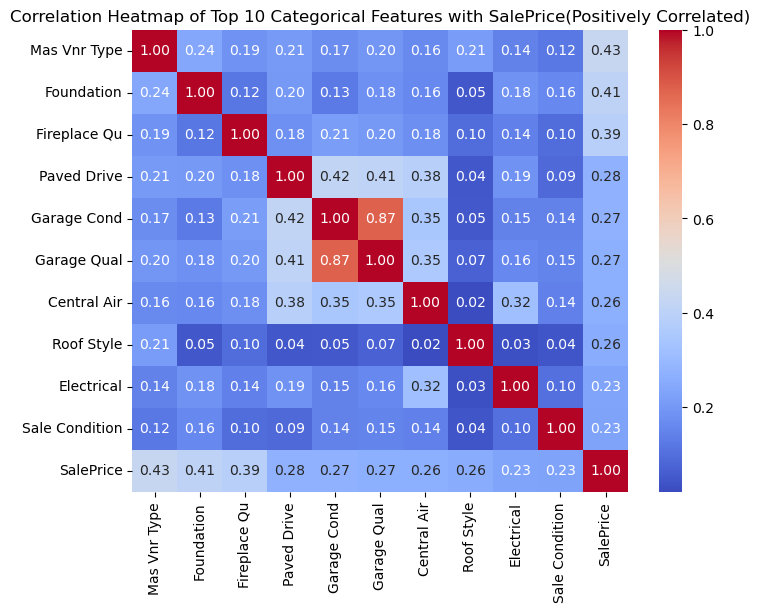

In [38]:
#Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Label encode categorical features
df_cat = df[categorical_cols].apply(lambda x: x.astype('category').cat.codes)

# Spearman correlation with SalePrice
cat_corr = df_cat.corrwith(df['SalePrice']).sort_values(ascending=False)

# Top 10 categorical features
top_cat = cat_corr[:10]
print("Top 10 categorical features posivetely correlated with SalePrice:\n", top_cat)

plt.figure(figsize=(8, 6))
sns.heatmap(df_cat[top_cat.index].assign(SalePrice=df['SalePrice']).corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Top 10 Categorical Features with SalePrice(Positively Correlated)")
plt.show()


TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 800x1000 with 0 Axes>